**Nama  :** Nadia Amalia Maslahah
**PYTHON DATA SCIENCE**

### **IMPORT LIBRARIES**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

**DATA LOADING**

In [ ]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
df.shape

(693071, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

# EDA

mencari central tendency, rata rata dari pengguna uber dan lyft

In [ ]:
uber_data = df[df['cab_type']=='Uber']
lyft_data = df[df['cab_type']=='Lyft']

## **Uber**

harga tarif uber sesuai dengan jarak dan kelipatan pengguna

Text(0.5, 1.0, 'Uber : Distance - Price')

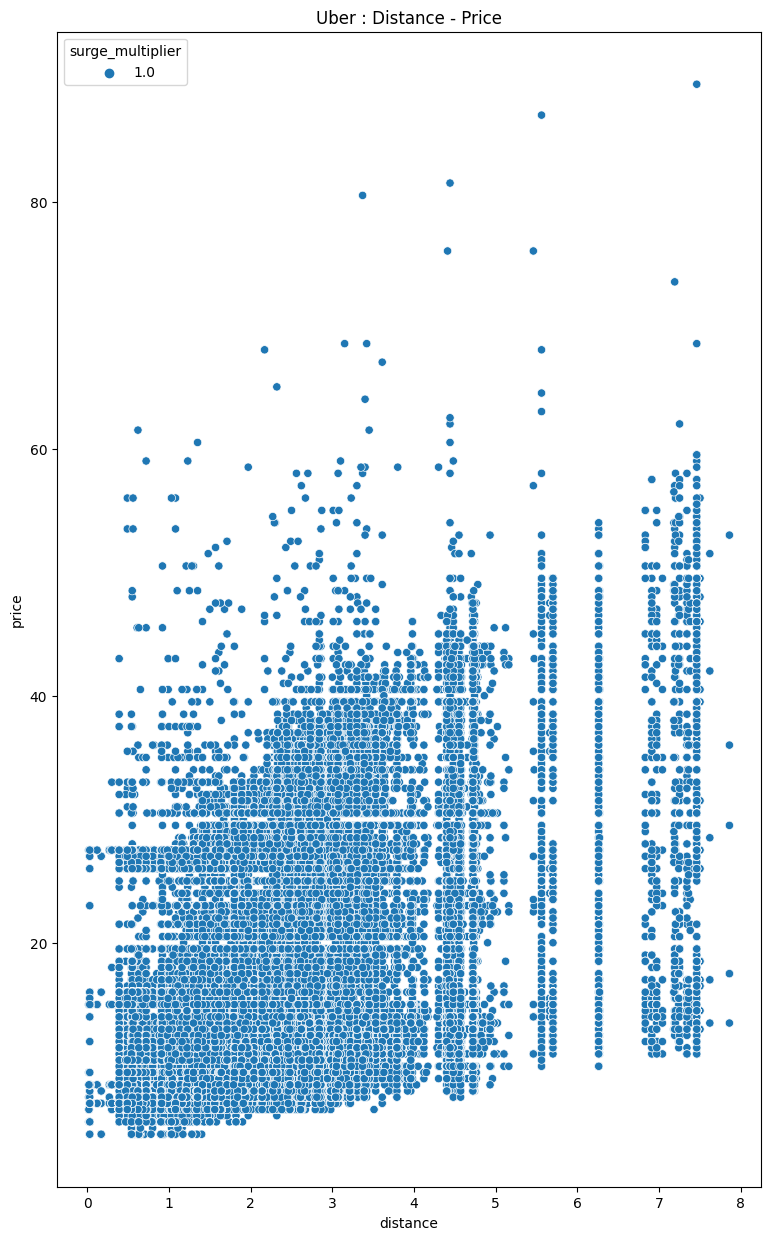

In [ ]:
uber_sm_dis_price = uber_data[['distance','surge_multiplier','price']]
# plotting menggunakan scatter plot
plt.figure(figsize=(20,15))
plt.subplot(121)
sns.scatterplot(data = uber_sm_dis_price, x = 'distance', y='price', hue='surge_multiplier').set_title("Uber : Distance - Price")

Dari visualisasi untuk data uber diatas dapat dilihat bahwa distance dan price tidak memiliki korelasi yang kuat, price tidak bertambah secara linier.

rata rata tujuan pengguna uber

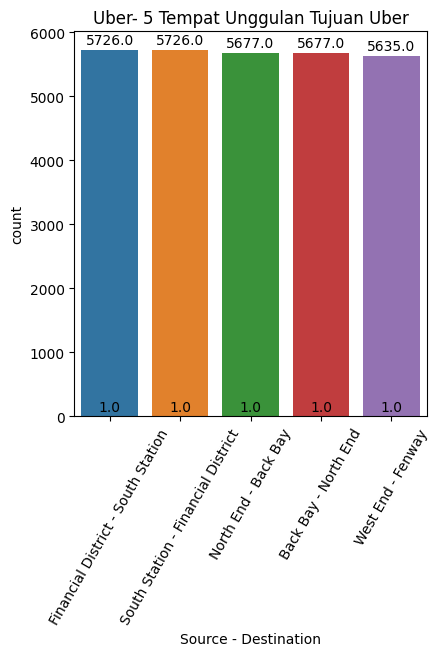

In [ ]:
uber_new_data = uber_data.groupby(['source','destination']).size().reset_index()
uber_new_data.columns = ['source','destination','total']
uber_new_data.sort_values('total', ascending=False, inplace=True)
uber_top5 = uber_new_data.head(5)
uber_top5["Source - Destination"] = uber_new_data["source"] + " - " + uber_new_data["destination"]
uber_top5 = uber_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(10, 5))
plt.subplot(121)
bp =sns.barplot(data = uber_top5, x = "Source - Destination", y = "total")
bp.set_title("Uber- 5 Tempat Unggulan Tujuan Uber")
loc, labels = plt.xticks()
bp.set_xticklabels(labels, rotation=60);
ax = sns.countplot(x='Source - Destination', data=uber_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

**5 Tempat Unggulan Tujuan Uber**


1.   Financial District - South Station
2.   South Station - Financial District
3.   Nort End - Back Bay
4.   Back Bay - North End
5.   West End - Fenway

## **Lyft**

Text(0.5, 1.0, 'Lyft : Distance - Price')

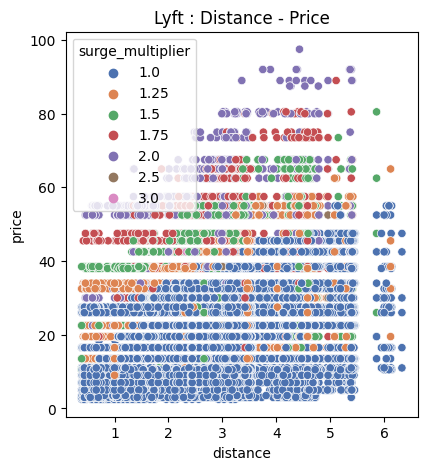

In [ ]:
lyft_sm_dis_price = lyft_data[['surge_multiplier','distance','price']]
plt.figure(figsize=(10,5))
plt.subplot(122)
sns.scatterplot(data = lyft_sm_dis_price, x = 'distance', y='price', hue='surge_multiplier', palette='deep').set_title("Lyft : Distance - Price")

lyft ketika distance bertambah, harga ikut bertambah. dapat dilihat juga bahwa dengan harga tertinggi, lebih banyak surge multiplier yang juga bertambah

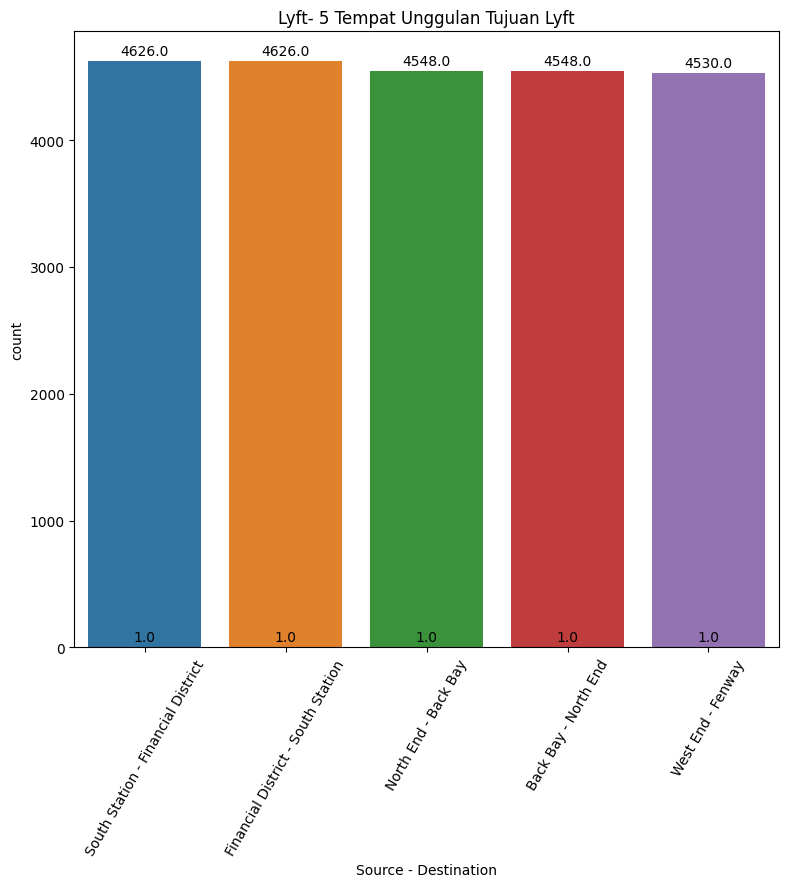

In [ ]:
lyft_new_data = lyft_data.groupby(['source','destination']).size().reset_index()
lyft_new_data.columns = ['source','destination','total']
lyft_new_data.sort_values('total', ascending=False, inplace=True)
lyft_top5 = lyft_new_data.head(5)
lyft_top5["Source - Destination"] = lyft_new_data["source"] + " - " + lyft_new_data["destination"]
lyft_top5 = lyft_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp =sns.barplot(data = lyft_top5, x = "Source - Destination", y = "total")
bp.set_title("Lyft- 5 Tempat Unggulan Tujuan Lyft")
loc, labels = plt.xticks()
bp.set_xticklabels(labels, rotation=60);
ax = sns.countplot(x='Source - Destination', data=lyft_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

**5 Tempat Unggulan Tujuan Lyft**

1. South Station - Financial District
2. Financial District - South Station
3. Nort End - Back Bay
4. Back Bay - North End
5. West End - Fenway

## **DATA CLEANING**

Dikarenakan Kolom price memiliki nilai null sebesar 55095. dan fitur price merupakan variable yang bergantung pada projek yang akan dibuat,jika memaksa mengisi nilai null pada fitur price akan mengakibatkan lebih banyak nilai yang error dan akurasi yang kurang. Jadi hapus semua record dimana kolom price memiliki nilai null.

In [ ]:
df = df.dropna(subset=['price']).reset_index()

In [ ]:
df.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

In [ ]:
# Hapus fitur yang tidak memiliki bergantung terhadap prediksi (price), karena tidak berpengaruh pada projek yang akan dibuat
# karena sudah ada atribut jarak dan parameter waktu
df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
             'windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
             'apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','latitude','longitude'],
            axis=1)
print(df.shape)
df.head()

(637976, 41)


,index,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [ ]:
# hubungan antara fitur price dan fitur yang memiliki relasi dengan temperature
new_df = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
new_df.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


In [ ]:
#Hapus semua fitur yang berhubungan dengan temperatur dari dataframe karena mereka memiliki korelasi yang lemah terhadap predictand (price)
new_df = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
df = df.drop(new_df.columns, axis=1)
print(df.shape)
df.head()

(637976, 30)


,index,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


**pembagian antara tipe kategori yang bisa dikelompokan dan numerik**

In [ ]:
# eksplorasi dan analisis data pada fitur dengan tipe categorical
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
new_data = df[categorical_cols]
new_data.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


In [ ]:
# cek nilai unik pada setiap kolom yang bertipe categorical
for col in new_data:
    print(f"{col} :{new_data[col].unique()}")
    print()

timezone :['America/New_York']

source :['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination :['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type :['Lyft' 'Uber']

product_id :['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name :['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary :[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' 

In [ ]:
new_data['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [ ]:
# hapus timezone karena sebagian besar data nya (>50%) hanya berisi data sampah
df = df.drop(['timezone','product_id'], axis=1)
df.head()

,index,hour,day,month,source,destination,cab_type,name,price,distance,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [ ]:
#analisis kolom/fitur yang memiliki tipe numerical
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
new_data = df[num_cols]
new_data.columns

Index(['index', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'moonPhase', 'precipIntensityMax'],
      dtype='object')

In [ ]:
#analisis dan cek tingkat korelasi antara fitur yang berhubungan dengan cuaca dan price
climate_cols = ['price','precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax',]
new_data = df[climate_cols]
new_data.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [ ]:
#semua fitur yang berhubungan dengan cuaca memiliki korelasi yang rendah hampir 0 terhadap kolom price. drop kolom kolom tersebut
climate_cols = ['precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']
df = df.drop(climate_cols, axis=1)
print(df.shape)
df.head()

(637976, 13)


,index,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


## **DATA PREPROCESSING**

In [ ]:
# Binary encode kolom cab_type
df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})

In [ ]:
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_cols)

['source', 'destination', 'name', 'short_summary', 'icon']


In [ ]:
#inisiasi OneHotEncoder dan menggabungkan original dataframe dengan kolom encode ke dataframe
for col in categorical_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        encoder_df.columns = encoder.get_feature_names_out([col])
        df = df.drop(col, axis=1)
        df = pd.concat([df, encoder_df], axis=1)

In [ ]:
# analisis dan cek korelasi antara price dengan kolom yang berhubungan dengan source
source_cols = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University','source_Fenway',
               'source_Financial District', 'source_Haymarket Square','source_North End', 'source_North Station',
               'source_Northeastern University', 'source_South Station','source_Theatre District',
               'source_West End']
new_data = df[source_cols]
new_data.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#kolom yang berhubungan dengan source memiliki pengaruh yang cukup signifikan terhadap price. kemudian cek kolom destinasi dengan cara yang sama untuk melihat rate korelasi terhadap price
destination_cols =['price','destination_Back Bay','destination_Beacon Hill', 'destination_Boston University',
                   'destination_Fenway', 'destination_Financial District','destination_Haymarket Square',
                   'destination_North End','destination_North Station', 'destination_Northeastern University',
                   'destination_South Station', 'destination_Theatre District','destination_West End']
new_data = df[destination_cols]
new_data.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
drop_cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
df = df.drop(drop_cols, axis=1)
print(df.shape)
df.head()

(637976, 36)


,index,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# cek korelasi dari kolom summary dengan price
summary_cols = ['price','short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
                'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
                'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ']
new_data = df[summary_cols]
new_data.head()

,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#dapat dilihat bahwa kolom summary dan kolom icon tidak ada pengaruh ke price karena nilai korelasi mereka terlalu rendah (hampir 0) jadi drop kolom kolom tersebut
drop_cols = ['short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
             'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
             'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ',
             'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ','icon_ partly-cloudy-day ',
             'icon_ partly-cloudy-night ','icon_ rain ']
df = df.drop(drop_cols,axis=1)
print(df.shape)
df.head()

(637976, 20)


,index,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#fitur hour, day, month memiliki korelasi yang rendah. tetapi, kolom distance dan surge_multiplier memiliki korelasi yang bagus dengan price. jadi drop kolom kolom yang memiliki korelasi yang rendah
df = df.drop(['hour', 'day', 'month'], axis=1)
print(df.shape)
df.head()

(637976, 17)


,index,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# cek nilai null pada semua fitur
df.isnull().sum()

index                0
cab_type             0
price                0
distance             0
surge_multiplier     0
name_Black           0
name_Black SUV       0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
name_Lyft            0
name_Lyft XL         0
name_Shared          0
name_UberPool        0
name_UberX           0
name_UberXL          0
name_WAV             0
dtype: int64

**cek outliers, cek nilai min dan max threshold dan plot kolom price ke box plot**

In [ ]:
max_threshold = df['price'].quantile(0.99)
max_threshold

42.5

In [ ]:
min_threshold = df['price'].quantile(0.01)
min_threshold

3.5

<Axes: >

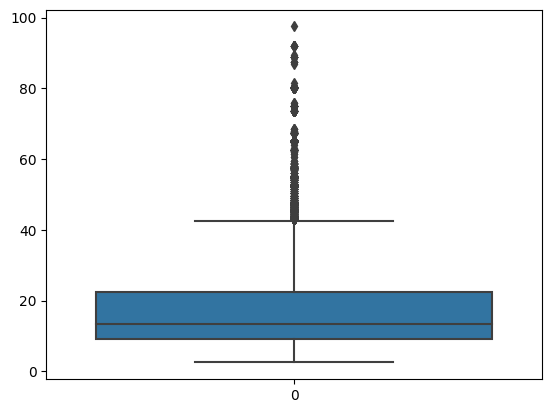

In [ ]:
sns.boxplot(df['price'])

In [ ]:
outliers = np.where(df['price']>42.5)
print(outliers[0])
print(np.count_nonzero(np.where(df['price']>42.5)))

[   645    646    706 ... 637813 637878 637917]
5589


In [ ]:
df.drop(outliers[0], inplace=True)
df.shape

(632387, 17)

### cek kecondongan pada semua fitur

<Axes: >

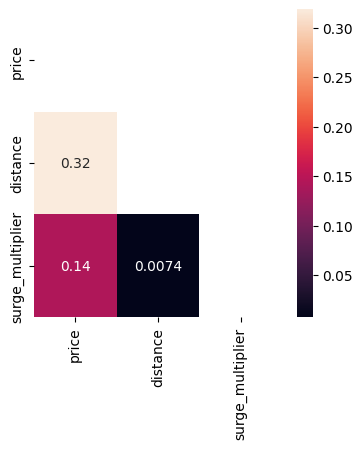

In [ ]:
columns = ['price','distance','surge_multiplier']
new_df = df[columns]
plt.figure(figsize=(4,4))
sns.heatmap(new_df.corr(), annot=True, mask=np.triu(new_df.corr()))

surge multiplier memiliki nilai skew yang tinggi dan korelasi yang kurang dengan predictand (price), dimana kolom distance meliki korelasi yang baik.jadi hapus skewneww dari surge multiplier menggunakan transformasi BoxCox.Transformasi Box-Cox merupakan transformasi pangkat pada variabel respons yang dikembangkan oleh Box dan Cox, yang bertujuan untuk menormalkan data, melinearkan model regresi dan menghomogenkan varians.

In [ ]:
from scipy import stats
df['surge_multiplier'] = stats.boxcox(df['surge_multiplier'])[0]
pd.Series(df['surge_multiplier']).skew()

5.64331840785854

In [ ]:
df.drop(columns=['index'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['cab_type', 'price', 'distance', 'surge_multiplier', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

In [ ]:
df.rename(columns={'name_Black':'Uber Black','name_Black SUV':'Uber Black SUV', 'name_Lux':'Lyft Lux',
                   'name_Lux Black':'Lyft Lux Black','name_Lux Black XL':'Lyft Lux Black XL','name_Lyft':'Lyft',
                   'name_Lyft XL':'Lyft XL', 'name_Shared':'Lyft Shared', 'name_UberPool':'Uber Pool',
                   'name_UberX':'Uber X', 'name_UberXL':'Uber XL', 'name_WAV':'Uber WAV'}, inplace=True)
df.columns

Index(['cab_type', 'price', 'distance', 'surge_multiplier', 'Uber Black',
       'Uber Black SUV', 'Lyft Lux', 'Lyft Lux Black', 'Lyft Lux Black XL',
       'Lyft', 'Lyft XL', 'Lyft Shared', 'Uber Pool', 'Uber X', 'Uber XL',
       'Uber WAV'],
      dtype='object')

In [ ]:
df.drop(columns=['cab_type'], inplace=True)
df.head()

,price,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
0,5.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['price']
y.head(3)

0     5.0
1    11.0
2     7.0
Name: price, dtype: float64

In [ ]:
X = df.drop(columns=['price'], axis=1)
X.head()

,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
model_LR = LinearRegression()
model = model_LR.fit(x_train, y_train)
ypred = model.predict(x_test)

In [ ]:
X.shape

(632387, 14)

In [ ]:
print(x_test.shape)
print(y_test.shape)
print(ypred.shape)

(63239, 14)
(63239,)
(63239,)


In [ ]:
model.coef_

array([ 2.67107605e+00,  6.37918871e+02,  4.25183190e+00,  1.38250416e+01,
        9.74661405e-01,  6.09844346e+00,  1.47237900e+01, -7.14162268e+00,
       -1.45848091e+00, -1.02059164e+01, -7.49595280e+00, -6.48604762e+00,
       -6.00543844e-01, -6.48520409e+00])

In [ ]:
model.intercept_

10.395974695598529

# **EVALUATION**

In [ ]:
#cek nilai R2 untuk linear regression
from sklearn import metrics
metrics.r2_score(y_test, ypred)

0.9322505503717716

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_val = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)

cross_val_score(LinearRegression(), X, y, cv=cross_val)

array([0.93109145, 0.93018911, 0.930808  , 0.93035801, 0.93018028])

In [ ]:
# hitung akar dari mean squared error (MSE) untuk linear regression
mse = metrics.mean_squared_error(y_test,ypred)
rootmse = np.sqrt(mse)
print(mse)
print(rootmse)

5.207727889077963
2.282044672892703


In [ ]:
mae = metrics.mean_absolute_error(y_test, ypred)
rootmae = np.sqrt(mae)
print(mae)
print(rootmae)

1.6828255588422358
1.2972376647485362


In [ ]:
def predict_price(name_cab,distance,surge_multiplier):
    loc_index = np.where(X.columns==name_cab)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [ ]:
predict_price('Lyft Lux',0.44,0.0)

12.5459095640928

dengan jenis mobil **Lyft Lux**, jarak **0.44**, dan tidak dengan kelipatan pengguna maka tarif kendaraan tersebut adalah **12.545**

In [ ]:
predict_price('Lyft',0.44,0.0)

4.429625475658109

dengan jenis mobil **Lyft**, jarak **0.44**, dan tidak dengan kelipatan pengguna maka tarif kendaraan tersebut adalah **4.429**

In [ ]:
predict_price('Uber WAV',0.44,0.0)

5.086044067657791

dengan jenis mobil **Uber WAV**, jarak **0.44**, dan tidak dengan kelipatan pengguna maka tarif kendaraan tersebut adalah **5.086**

In [ ]:
predict_price('Uber X',0.44, 0.0)

5.085200537541662

dengan jenis mobil **Uber x**, jarak **0.44**, dan tidak dengan kelipatan pengguna maka tarif kendaraan tersebut adalah **5.086**

In [ ]:
predict_price('Uber X',0.44, 0.1)

68.8770876454151

# **KESIMPULAN**

Dataset ini memiliki dimensi yang tinggi yaitu 693071 × 57. dengan begitu banyaknya fitur perlu diketahui fitur mana saja yang memiliki korelasi yang cukup, hal itu sangat berguna ketika dalam proses prediksi. dikarenakan tujuan utama dalam projek ini adalah untuk memprediksi harga maka fitur price merupakan variabel dependent yang akan menjadi predictand. dilakukan analisis dengan menggunakan fungsi korelasi dan heatmap plot dari 57 fitur kami mengambil fitur **distance, surge_multiplier dan name_cab** karena fitur-fitur tersebut memiliki korelasi yang cukup berpengaruh ke variabel dependent(**price**). Pada section EDA bisa dilihat bahwa Top 5 source-destination pada cab jenis uber dan lyft adalah sama, yaitu : Financial District-South Station (dan sebaliknya), Back Bay-North End (dan sebaliknya), West End-Fenway. Transaksi berdasarkan nama cab pada cab jenis uber dan lyft memiliki hasil yang sama tetapi beda jumlah nilai. //
Untuk membuat model prediksi, pada projek ini menggunakan algoritma Linear Regression. Proses prediksi menggunakan R2 score dengan memanfaatkan library scikit-learn untuk mempermudah proses. R2 score merupakan salah satu metode yang digunakan untuk mengukur performa evaluasi pada regression. Hasil prediksi diatas dapat dilihat bahwa model prediksi menghasilkan nilai sebesar 0.93 atau 93% yang mana hasil tersebut menunjukkan nilai prediksi yang baik.